In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
in_path = Path('../data/raw')
out_path = Path('../data/interim')

In [28]:
df = pd.read_csv(in_path / 'properties_outlier_treated.csv')

In [29]:
df.shape

(5829, 23)

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9317.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16048.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


In [31]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1633
agePossession             0
super_built_up_area    3321
built_up_area          3366
carpet_area            2459
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

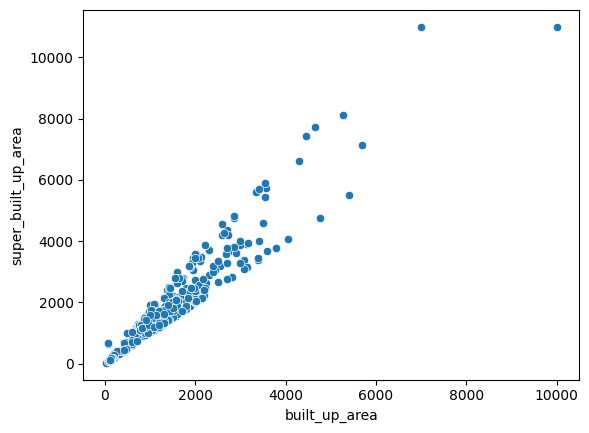

In [32]:
sns.scatterplot(df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

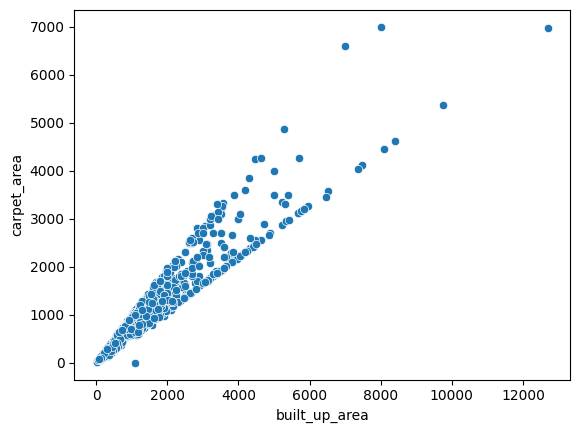

In [33]:
sns.scatterplot(df,x='built_up_area',y='carpet_area')

In [34]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
5824    False
5825    False
5826    False
5827    False
5828    False
Length: 5829, dtype: bool

In [35]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [36]:
all_present_df.shape

(649, 23)

In [37]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [38]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [39]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.25 0.8285714285714286


In [40]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [41]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
16,flat,swati symphony,bodakdev,2.51,7200.0,3486.0,Super Built up area 3492(324.42 sq.m.)Carpet a...,4,4,2,0.0,North,Under Construction,3492.0,NaN,2095.0,0,0,1,0,0,0,45
33,flat,shilp synergy,chandkheda,0.55,5978.0,920.0,Super Built up area 1485(137.96 sq.m.)Carpet a...,3,2,0,1.0,North-East,Old Property,1485.0,NaN,920.0,0,0,0,0,1,0,54
37,flat,prerna shikhar,bodakdev,1.15,5437.0,2115.0,Super Built up area 2115(196.49 sq.m.)Carpet a...,3,3,2,7.0,NaN,Old Property,2115.0,NaN,1800.0,0,0,0,0,0,1,31


In [42]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.2) + (sbc_df['carpet_area']/0.85))/2),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_9656\569765207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.2) + (sbc_df['carpet_area']/0.85))/2),inplace=True)


In [43]:
df.update(sbc_df)

In [44]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1633
agePossession             0
super_built_up_area    3321
built_up_area          2701
carpet_area            2459
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [45]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [46]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,flat,krishna shrimad afford,nikol,0.37,3426.0,1080.0,Super Built up area 1080(100.34 sq.m.),2,2,2,1.0,North-East,Relatively New,1080.0,NaN,NaN,0,0,0,1,1,0,0
17,flat,zodiac marquis,bodakdev,3.43,8099.0,4235.0,Super Built up area 4239(393.82 sq.m.),4,4,2,3.0,North,Relatively New,4239.0,NaN,NaN,0,0,1,0,0,0,60
31,flat,gala glory,south bopal,0.56,4746.0,1180.0,Super Built up area 1180(109.63 sq.m.),2,2,1,13.0,NaN,Relatively New,1180.0,NaN,NaN,0,0,1,1,0,0,158
32,flat,alpine heights,navrangpura,0.70,5761.0,1215.0,Super Built up area 135(112.88 sq.m.),2,2,2,9.0,North-East,Relatively New,135.0,NaN,NaN,0,0,0,0,0,0,72
34,flat,rajipa greenland,nikol,0.50,4274.0,1170.0,Super Built up area 1170(108.7 sq.m.),2,2,2,3.0,East,Moderately Old,1170.0,NaN,NaN,0,0,0,0,1,1,54


In [47]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.205),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_9656\4108336686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.205),inplace=True)


In [48]:
df.update(sb_df)

In [49]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1633
agePossession             0
super_built_up_area    3321
built_up_area          1550
carpet_area            2459
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [50]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [51]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,nakshatra heights,narol,0.29,2754.0,1053.0,Carpet area: 1071 (99.5 sq.m.),2,2,1,4.0,NaN,Relatively New,NaN,NaN,1071.0,0,0,0,0,0,0,74
6,flat,radhe radiance residency,motera,0.82,6555.0,1251.0,Carpet area: 1251 (116.22 sq.m.),2,2,1,4.0,North-East,Relatively New,NaN,NaN,1251.0,0,0,0,0,0,2,116
18,flat,swati chrysantha,shela,1.28,8533.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,3+,1.0,NaN,Relatively New,NaN,NaN,1500.0,0,0,0,0,0,1,61
20,flat,on request,koteshwar,0.37,2596.0,1425.0,Carpet area: 1425 (132.39 sq.m.),2,2,2,3.0,North-East,Relatively New,NaN,NaN,1425.0,1,1,0,1,0,0,244
22,house,aarohi club plots,south bopal,3.20,12790.0,2502.0,Plot area 2502(232.44 sq.m.)Carpet area: 2925 ...,3,3,2,2.0,West,Relatively New,NaN,NaN,2925.0,1,0,1,1,0,1,165


In [52]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.85),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_9656\1502780705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.85),inplace=True)


In [53]:
df.update(c_df)

In [54]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1633
agePossession             0
super_built_up_area    3321
built_up_area             0
carpet_area            2459
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

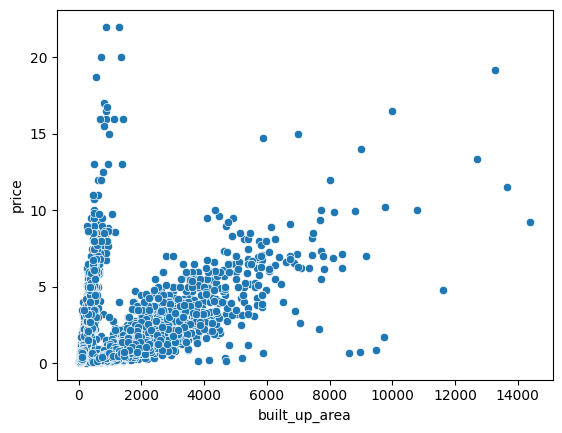

In [55]:
sns.scatterplot(df,x='built_up_area',y='price')

In [56]:
anamoly_df = df[(df['built_up_area'] < 1800) & (df['price'] > 1.5)][['price','area','built_up_area']]

In [57]:
anamoly_df.sample(5)

,price,area,built_up_area
190,3.11,2250.0,500.0
5207,8.00,5400.0,706.0
4227,2.06,2475.0,324.0
5482,2.50,3690.0,461.0
1287,3.21,3960.0,250.0


In [58]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [59]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

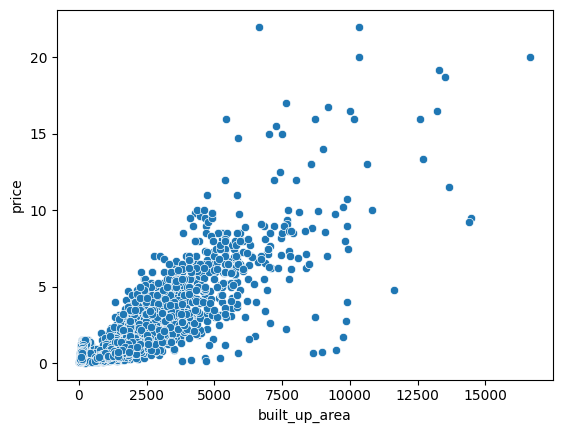

In [60]:
sns.scatterplot(df,x='built_up_area',y='price')

In [61]:
anamoly_df_2 = df[df['built_up_area']<500]

<Axes: xlabel='built_up_area', ylabel='area'>

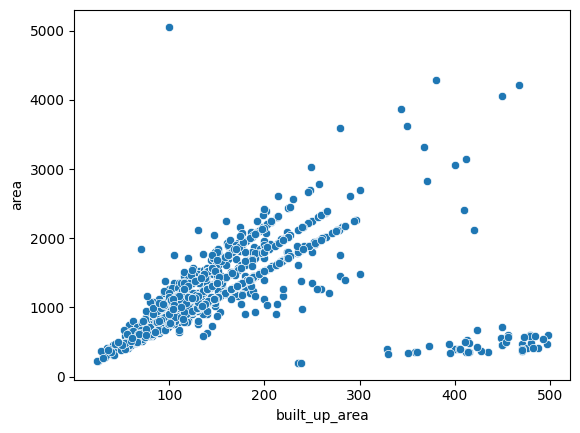

In [62]:
sns.scatterplot(anamoly_df_2,x='built_up_area',y='area')

In [63]:
# temp.to_csv('temp.csv')

In [64]:
anamoly_df_2['built_up_area'] = anamoly_df_2['area']

C:\Users\Arpit\AppData\Local\Temp\ipykernel_9656\53125652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df_2['built_up_area'] = anamoly_df_2['area']


In [65]:
df.update(anamoly_df_2)

In [67]:
# sns.distplot(df['built_up_area'])

In [77]:
temp = df[df['built_up_area']>4000]
# temp.to_csv('temp.csv')

In [78]:
temp[(df['price']<1)&(temp['bedRoom']<4)]

C:\Users\Arpit\AppData\Local\Temp\ipykernel_9656\1481755152.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp[(df['price']<1)&(temp['bedRoom']<4)]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [74]:
df.drop(index=temp[(temp['price']<1)&(temp['bedRoom']<4)].index,inplace=True)

In [79]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9317.0,3,3,1,3.0,East,Relatively New,1005.0,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16048.0,5,5,2,1.0,East,Relatively New,3988.0,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,2,2,1,2.0,East,Relatively New,1046.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,3,3,1,4.0,NaN,Old Property,1360.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,3,3,1,1.0,NaN,Moderately Old,2412.0,0,0,1,0,0,0,17


In [81]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             37
facing             1630
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [82]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
347,house,r r solution,gurukul,6.50,17735.0,4,4,2,NaN,NaN,Moderately Old,3665.0,0,0,0,0,0,1,0
466,house,"sugam villa, ghuma",ghuma,4.25,7496.0,4,4,2,NaN,NaN,Moderately Old,5670.0,0,0,0,0,0,0,0
555,house,"tulip farm house,",shilaj,12.00,15000.0,5,5,0,NaN,NaN,New Property,8000.0,0,0,0,0,0,0,46
631,house,independent,prahlad nagar,2.20,8015.0,4,4,1,NaN,NaN,Moderately Old,2745.0,0,0,0,0,0,0,25
859,house,laxminagar society,narol,0.18,4000.0,1,1,1,NaN,NaN,Old Property,450.0,0,0,0,0,0,0,0
947,house,sarvoday nagar part-3,ghatlodia,0.85,7083.0,2,3,2,NaN,West,Old Property,1200.0,0,0,0,1,0,2,32
1088,flat,maruti residence,vatva,0.14,2090.0,2,1,0,NaN,NaN,New Property,670.0,0,0,0,0,0,0,0
1149,house,independent,prahlad nagar,1.40,11111.0,2,2,0,NaN,NaN,Relatively New,1260.0,0,0,0,0,0,0,25
1187,house,independent,krishna nagar,0.51,4048.0,3,2,0,NaN,NaN,Relatively New,1260.0,0,0,0,0,0,0,8
1434,house,gulmohar greens,science city,6.50,10943.0,4,4,2,NaN,NaN,Relatively New,5940.0,0,0,0,0,0,0,0


In [83]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [84]:
df['floorNum'].fillna(2.0,inplace=True)

In [85]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1630
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [86]:
1011/df.shape[0]

0.17368149802439442

### facing

<Axes: ylabel='count'>

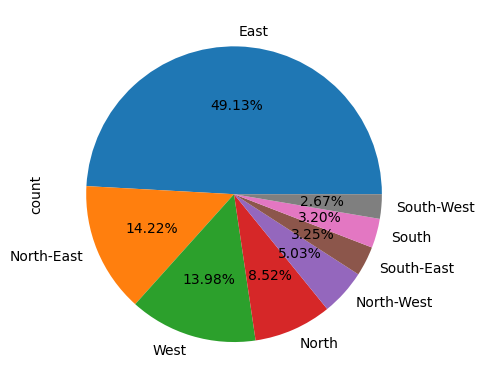

In [87]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [88]:
# df.drop(columns=['facing'],inplace=True)

In [89]:
df['facing'].fillna('NA',inplace=True)

In [90]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1906,flat,atirus adani,jagatpur,0.81,4821.0,3,3,1,3.0,West,Under Construction,1200.0,1,0,1,0,0,0,103
1498,house,independent,krishna nagar,0.55,7857.0,1,1,1,1.0,East,Undefined,700.0,0,0,0,0,0,0,0
2347,flat,sheladia pratishtha apartments,bodakdev,2.80,13333.0,4,3,2,4.0,West,Old Property,2471.0,0,0,0,1,0,1,112
3167,house,"swastik society, manipur",ghuma,0.55,4701.0,4,4,1,3.0,NA,Moderately Old,1170.0,0,0,0,0,0,0,0
5374,house,navratna kalhaar bungalows,shilaj,8.65,11047.0,4,4,1,2.0,East,Relatively New,7830.0,1,0,1,1,0,0,97


In [91]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [92]:
df['agePossession'].value_counts()

agePossession
Relatively New        1788
Moderately Old        1262
Old Property          1042
Under Construction     668
Undefined              534
New Property           527
Name: count, dtype: int64

In [93]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,flat,maruti shree ram vandan,naroda,0.20,3044.0,1,1,0,4.0,NA,Undefined,657.0,0,0,0,0,0,0,0
27,flat,3rd eye residency one motera,motera,0.60,4934.0,2,2,1,4.0,NA,Undefined,1216.0,0,0,0,0,0,0,0
28,house,independent,naroda,0.25,6831.0,1,1,0,1.0,NA,Undefined,366.0,0,0,0,0,0,0,0
39,flat,keshav apartment,chandkheda,0.25,5165.0,1,1,2,8.0,NA,Undefined,484.0,0,0,0,0,0,0,0
48,flat,sky skyline appartment,nikol,0.65,4127.0,3,3,1,0.0,NA,Undefined,1575.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,flat,sakar residency,vastral,0.10,2625.0,1,1,1,7.0,NA,Undefined,381.0,0,0,0,0,0,0,0
5798,flat,shreeji sharnam residency,nikol,0.72,8989.0,3,3,2,2.0,East,Undefined,801.0,0,0,0,0,0,0,0
5805,flat,avirat silver harmony 2,gota,1.07,5000.0,3,3,2,5.0,NA,Undefined,2142.0,0,0,1,0,0,0,82
5811,flat,shri sp nirvana,south bopal,0.42,3349.0,2,2,3,3.0,East,Undefined,1465.0,0,0,0,0,0,0,38


In [94]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [95]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [96]:
df['agePossession'].value_counts()

agePossession
Relatively New        1974
Moderately Old        1389
Old Property          1228
Under Construction     672
New Property           528
Undefined               30
Name: count, dtype: int64

In [97]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [98]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [99]:
df['agePossession'].value_counts()

agePossession
Relatively New        1987
Moderately Old        1403
Old Property          1231
Under Construction     672
New Property           528
Name: count, dtype: int64

In [100]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [101]:
df.to_csv(out_path / 'properties_missing_imputed.csv',index=False)

In [102]:
df.shape

(5821, 19)